In [104]:
#Import libraries

import numpy as np 
import pandas as pd 

import warnings 
warnings.filterwarnings("ignore")

In [105]:
df1 = pd.read_csv('data/Dataset 1_EV charging reports.csv',sep=';') #EV charging reports, describing each individual EV charging session
df1.head()



,session_ID,Garage_ID,User_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,Duration_hours,month_plugin,weekdays_plugin,Plugin_category,Duration_category
0,1,AdO3,AdO3-4,Private,NaN,21.12.2018 10:20,10,21.12.2018 10:23,10.0,"0,3","0,05",Dec,Friday,late morning (9-12),Less than 3 hours
1,2,AdO3,AdO3-4,Private,NaN,21.12.2018 10:24,10,21.12.2018 10:32,10.0,"0,87","0,136666667",Dec,Friday,late morning (9-12),Less than 3 hours
2,3,AdO3,AdO3-4,Private,NaN,21.12.2018 11:33,11,21.12.2018 19:46,19.0,"29,87","8,216388889",Dec,Friday,late morning (9-12),Between 6 and 9 hours
3,4,AdO3,AdO3-2,Private,NaN,22.12.2018 16:15,16,23.12.2018 16:40,16.0,"15,56","24,41972222",Dec,Saturday,late afternoon (15-18),More than 18 hours
4,5,AdO3,AdO3-2,Private,NaN,24.12.2018 22:03,22,24.12.2018 23:02,23.0,"3,62","0,970555556",Dec,Monday,late evening (21-midnight),Less than 3 hours


In [106]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6878 entries, 0 to 6877
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   session_ID         6878 non-null   int64  
 1   Garage_ID          6878 non-null   object 
 2   User_ID            6878 non-null   object 
 3   User_type          6878 non-null   object 
 4   Shared_ID          1412 non-null   object 
 5   Start_plugin       6878 non-null   object 
 6   Start_plugin_hour  6878 non-null   int64  
 7   End_plugout        6844 non-null   object 
 8   End_plugout_hour   6844 non-null   float64
 9   El_kWh             6878 non-null   object 
 10  Duration_hours     6844 non-null   object 
 11  month_plugin       6878 non-null   object 
 12  weekdays_plugin    6878 non-null   object 
 13  Plugin_category    6878 non-null   object 
 14  Duration_category  6844 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 806.1+ KB


In [107]:
df2 = pd.read_csv('data/Dataset 2_Hourly EV loads - Per user.csv',sep=';') #Hourly EV charging loads and idle capacity, for all users individually.
df2.head() 

,date_from,date_to,User_ID,session_ID,Synthetic_3_6kW,Synthetic_7_2kW,Flex_3_6kW,Flex_7_2kW
0,21.12.2018 10:00,21.12.2018 11:00,AdO3-4,1.0,"0,3","0,3",NaN,"0,06"
1,21.12.2018 10:00,21.12.2018 11:00,AdO3-4,2.0,"0,87","0,87",NaN,"0,114"
2,21.12.2018 11:00,21.12.2018 12:00,AdO3-4,3.0,"1,62","3,24",NaN,NaN
3,21.12.2018 12:00,21.12.2018 13:00,AdO3-4,3.0,"3,6","7,2",NaN,NaN
4,21.12.2018 13:00,21.12.2018 14:00,AdO3-4,3.0,"3,6","7,2",NaN,NaN


In [108]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88156 entries, 0 to 88155
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date_from        88156 non-null  object 
 1   date_to          88156 non-null  object 
 2   User_ID          87766 non-null  object 
 3   session_ID       87766 non-null  float64
 4   Synthetic_3_6kW  31110 non-null  object 
 5   Synthetic_7_2kW  18957 non-null  object 
 6   Flex_3_6kW       62086 non-null  object 
 7   Flex_7_2kW       72624 non-null  object 
dtypes: float64(1), object(7)
memory usage: 5.4+ MB


In [109]:
df3a = pd.read_csv('data/Dataset 3a_Hourly EV loads - Aggregated private.csv',sep=';') #Hourly EV charging loads and idle capacity, aggregated for users with private (3a) or shared (3b) CPs.
df3a.head()


,date_from,daily_hour,weekday,month,Synthetic_3_6kW,Synthetic_7_2kW,Flex_3_6kW,Flex_7_2kW,n_private
0,21.12.2018 10:00,10,Friday,Dec,"1,17","1,17",0,"0,174",1
1,21.12.2018 11:00,11,Friday,Dec,"1,62","3,24",0,0,1
2,21.12.2018 12:00,12,Friday,Dec,"3,6","7,2",0,0,1
3,21.12.2018 13:00,13,Friday,Dec,"3,6","7,2",0,0,1
4,21.12.2018 14:00,14,Friday,Dec,"3,6","7,2",0,0,1


In [110]:
df3a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9757 entries, 0 to 9756
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date_from        9757 non-null   object
 1   daily_hour       9757 non-null   int64 
 2   weekday          9757 non-null   object
 3   month            9757 non-null   object
 4   Synthetic_3_6kW  9757 non-null   object
 5   Synthetic_7_2kW  9757 non-null   object
 6   Flex_3_6kW       9757 non-null   object
 7   Flex_7_2kW       9757 non-null   object
 8   n_private        9757 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 686.2+ KB


In [111]:
df3b = pd.read_csv('data/Dataset 3b_Hourly EV loads - Aggregated shared.csv',sep=';') #Hourly EV charging loads and idle capacity, aggregated for users with private (3a) or shared (3b) CPs.
df3b.head()


,date_from,daily_hour,weekday,month,Synthetic_3_6kW,Synthetic_7_2kW,Flex_3_6kW,Flex_7_2kW,n_shared
0,10.01.2019 00:00,0,Thursday,Jan,0,0,0,0,1
1,10.01.2019 01:00,1,Thursday,Jan,0,0,0,0,1
2,10.01.2019 02:00,2,Thursday,Jan,0,0,0,0,1
3,10.01.2019 03:00,3,Thursday,Jan,0,0,0,0,1
4,10.01.2019 04:00,4,Thursday,Jan,0,0,0,0,1


In [112]:
df3b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9288 entries, 0 to 9287
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date_from        9288 non-null   object
 1   daily_hour       9288 non-null   int64 
 2   weekday          9288 non-null   object
 3   month            9288 non-null   object
 4   Synthetic_3_6kW  9288 non-null   object
 5   Synthetic_7_2kW  9288 non-null   object
 6   Flex_3_6kW       9288 non-null   object
 7   Flex_7_2kW       9288 non-null   object
 8   n_shared         9288 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 653.2+ KB


In [113]:
df5 = pd.read_csv('data/Dataset 5_AMS data from garage Bl2.csv',sep=';') #Hourly smart meter data from garage Bl2
df5.head()


,date_from,date_to,month,AMS_kWh,Synthetic_3_6kW,Synthetic_7_2kW,Simultaneous_if_3_6kW
0,02.01.2019 19:00,02.01.2019 20:00,Jan,"0,05","0,06","0,12",1.0
1,02.01.2019 20:00,02.01.2019 21:00,Jan,"6,6","3,6","7,2",1.0
2,02.01.2019 21:00,02.01.2019 22:00,Jan,"6,8","3,6","7,2",1.0
3,02.01.2019 22:00,02.01.2019 23:00,Jan,"1,45","3,6","0,12",1.0
4,02.01.2019 23:00,03.01.2019 00:00,Jan,"0,05","3,6",0,1.0


In [114]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9466 entries, 0 to 9465
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date_from              9466 non-null   object 
 1   date_to                9464 non-null   object 
 2   month                  9466 non-null   object 
 3   AMS_kWh                9458 non-null   object 
 4   Synthetic_3_6kW        8300 non-null   object 
 5   Synthetic_7_2kW        8300 non-null   object 
 6   Simultaneous_if_3_6kW  5188 non-null   float64
dtypes: float64(1), object(6)
memory usage: 517.8+ KB


In [115]:
df6 = pd.read_csv('data/Dataset 6_Local traffic distribution.csv',sep=';') #Local hourly traffic density.
df6.head()


,Date_from,Date_to,KROPPAN BRU,MOHOLTLIA,SELSBAKK,MOHOLT RAMPE 2,Jonsvannsveien vest for Steinanvegen
0,01.12.2018 00:00,01.12.2018 01:00,639,0,0,4,144
1,01.12.2018 01:00,01.12.2018 02:00,487,153,115,21,83
2,01.12.2018 02:00,01.12.2018 03:00,408,85,75,10,69
3,01.12.2018 03:00,01.12.2018 04:00,282,89,56,8,39
4,01.12.2018 04:00,01.12.2018 05:00,165,64,34,3,25


In [116]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10248 entries, 0 to 10247
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Date_from                             10248 non-null  object
 1   Date_to                               10248 non-null  object
 2   KROPPAN BRU                           10248 non-null  object
 3   MOHOLTLIA                             10248 non-null  object
 4   SELSBAKK                              10248 non-null  object
 5   MOHOLT RAMPE 2                        10248 non-null  int64 
 6   Jonsvannsveien vest for Steinanvegen  10248 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 560.6+ KB


In [117]:
df_weather = pd.read_csv("data/Norway_Trondheim_ExactLoc_Weather.csv") #Weather Data
df_weather.head()

,Unnamed: 0,clouds,datetime,dewpt,dhi,dni,ghi,max_dhi,max_dni,max_ghi,...,solar_rad,t_dhi,t_dni,t_ghi,t_solar_rad,temp,ts,wind_dir,wind_gust_spd,wind_spd
0,0,66,2018-12-01,-1.7,5,40,6,34,288,48,...,2,127,966,144,52,7.4,1543618800,187,12.8,5.5
1,1,64,2018-12-02,-2.8,5,38,6,33,281,46,...,5,123,923,135,126,5.4,1543705200,177,10.8,3.6
2,2,100,2018-12-03,-0.7,5,37,5,33,273,44,...,1,119,881,128,21,2.4,1543791600,142,4.8,1.5
3,3,93,2018-12-04,-0.5,5,35,5,32,266,42,...,1,115,842,121,22,0.8,1543878000,234,12.8,3.9
4,4,87,2018-12-05,-1.9,5,34,5,32,260,41,...,2,111,804,114,39,-0.4,1543964400,206,13.6,3.7


In [118]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       427 non-null    int64  
 1   clouds           427 non-null    int64  
 2   datetime         427 non-null    object 
 3   dewpt            427 non-null    float64
 4   dhi              427 non-null    int64  
 5   dni              427 non-null    int64  
 6   ghi              427 non-null    int64  
 7   max_dhi          427 non-null    int64  
 8   max_dni          427 non-null    int64  
 9   max_ghi          427 non-null    int64  
 10  max_temp         427 non-null    float64
 11  max_temp_ts      427 non-null    int64  
 12  max_uv           427 non-null    float64
 13  max_wind_dir     427 non-null    int64  
 14  max_wind_spd     427 non-null    float64
 15  max_wind_spd_ts  427 non-null    int64  
 16  min_temp         427 non-null    float64
 17  min_temp_ts     

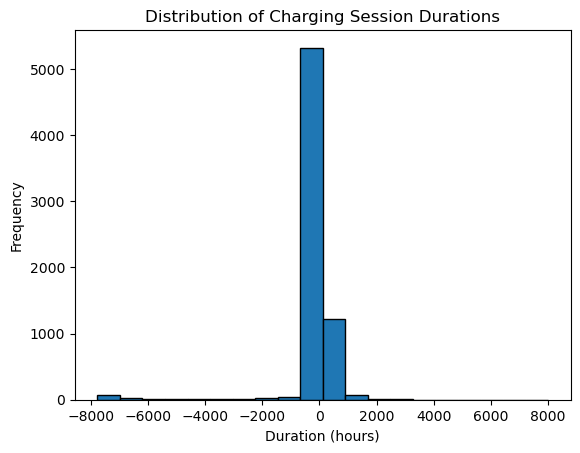

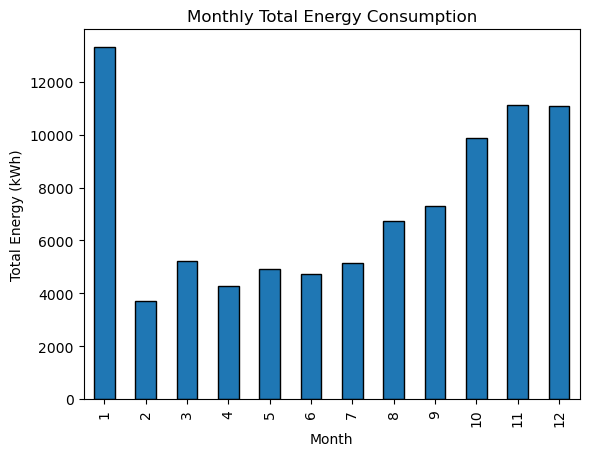

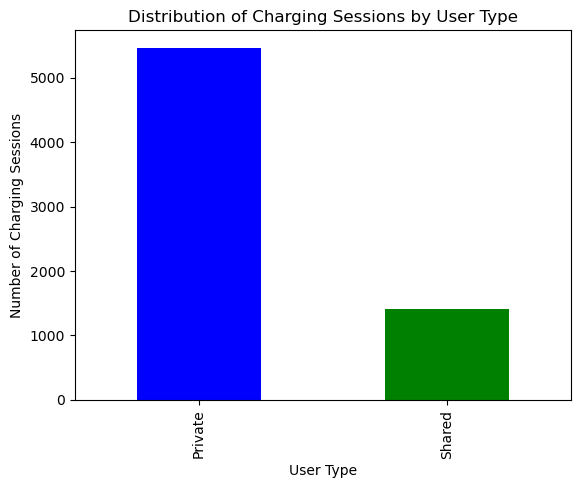

In [119]:
import matplotlib.pyplot as plt

# Convert columns to numeric after replacing commas with periods
numeric_columns = ['El_kWh', 'Duration_hours']
df1[numeric_columns] = df1[numeric_columns].replace({',': '.'}, regex=True).apply(pd.to_numeric, errors='coerce')

# Convert date columns to datetime
df1['Start_plugin'] = pd.to_datetime(df1['Start_plugin'])
df1['End_plugout'] = pd.to_datetime(df1['End_plugout'])

# Calculate charging session duration in hours
df1['Duration_hours'] = (df1['End_plugout'] - df1['Start_plugin']).dt.total_seconds() / 3600

# Plotting charging session duration distribution
plt.hist(df1['Duration_hours'], bins=20, edgecolor='black')
plt.title('Distribution of Charging Session Durations')
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.show()

# Temporal Analysis
df1['month_plugin'] = pd.to_datetime(df1['Start_plugin']).dt.month
monthly_energy = df1.groupby('month_plugin')['El_kWh'].sum()
monthly_energy.plot(kind='bar', edgecolor='black')
plt.title('Monthly Total Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Total Energy (kWh)')
plt.show()

# User Behavior Analysis
user_type_distribution = df1['User_type'].value_counts()
user_type_distribution.plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of Charging Sessions by User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Charging Sessions')
plt.show()

<Figure size 1000x600 with 0 Axes>

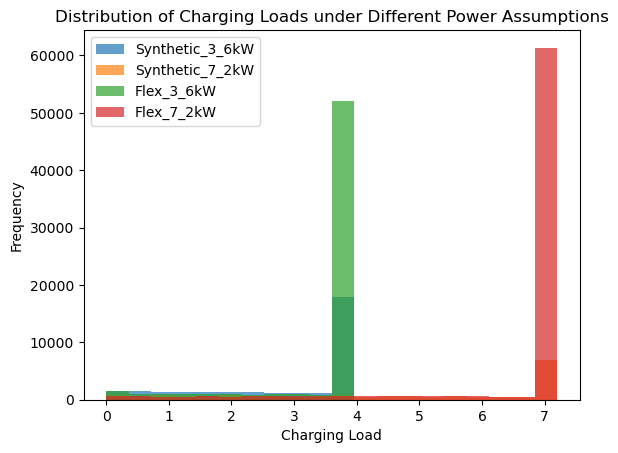

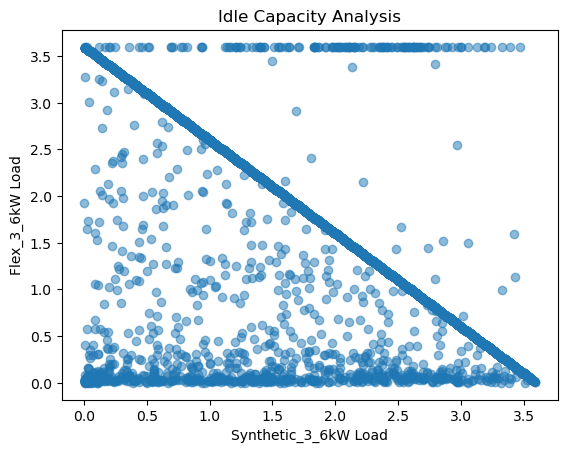

In [120]:

# Convert columns to numeric after replacing commas with periods
numeric_columns = ['Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW']
df2[numeric_columns] = df2[numeric_columns].replace({',': '.'}, regex=True).apply(pd.to_numeric, errors='coerce')

# Load Distribution Analysis
plt.figure(figsize=(10, 6))
df2[['Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW']].plot(kind='hist', alpha=0.7, bins=20)
plt.title('Distribution of Charging Loads under Different Power Assumptions')
plt.xlabel('Charging Load')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Idle Capacity Analysis
plt.scatter(df2['Synthetic_3_6kW'], df2['Flex_3_6kW'], alpha=0.5)
plt.title('Idle Capacity Analysis')
plt.xlabel('Synthetic_3_6kW Load')
plt.ylabel('Flex_3_6kW Load')
plt.show()

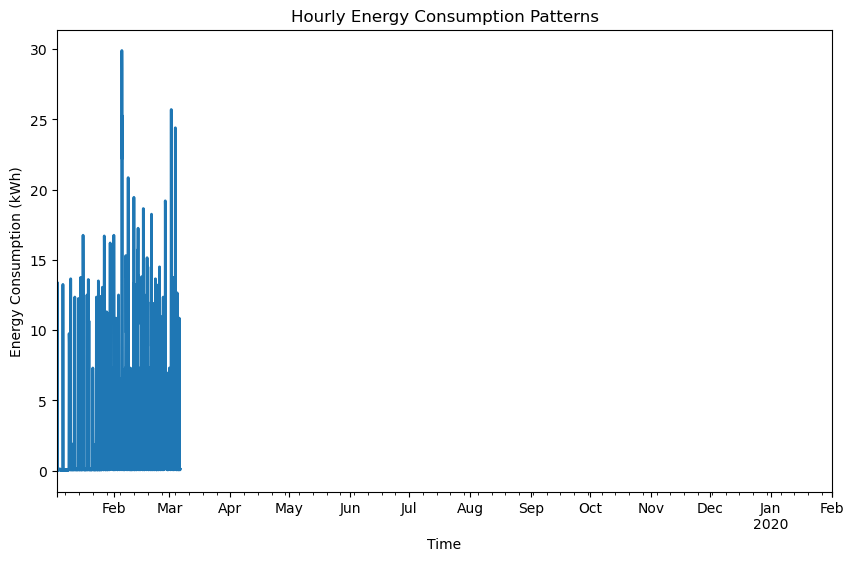

In [121]:
# Energy Consumption Patterns

# Convert the timestamp columns to datetime
df5['date_from'] = pd.to_datetime(df5['date_from'], format='%d.%m.%Y %H:%M')
df5['date_to'] = pd.to_datetime(df5['date_to'], format='%d.%m.%Y %H:%M')

# Combine 'date_from' and 'date_to' columns to get a complete timestamp range
timestamps = pd.date_range(start=df5['date_from'].min(), end=df5['date_to'].max(), freq='H')

# Create a new DataFrame with complete timestamp range and fill in energy consumption values
complete_data = pd.DataFrame(index=timestamps)
complete_data['AMS_kWh'] = 0.0  # Initialize energy consumption to zero

# Update energy consumption values from the original DataFrame
for index, row in df5.iterrows():
    start_time, end_time, energy = row['date_from'], row['date_to'], row['AMS_kWh']
    
    if not isinstance(energy, (float, int)):
        energy = pd.to_numeric(energy.replace(',', '.'), errors='coerce')
    
    complete_data.loc[start_time:end_time, 'AMS_kWh'] += energy

# Energy Consumption Patterns
complete_data['AMS_kWh'].plot(kind='line', figsize=(10, 6), linewidth=2)
plt.title('Hourly Energy Consumption Patterns')
plt.xlabel('Time')
plt.ylabel('Energy Consumption (kWh)')
plt.show()


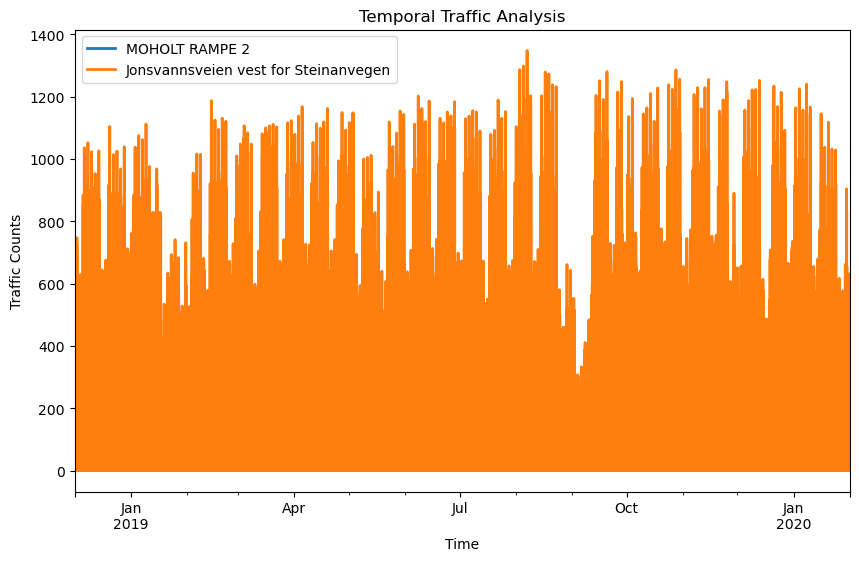

In [122]:


# Convert the timestamp columns to datetime
df6['Date_from'] = pd.to_datetime(df6['Date_from'], format='%d.%m.%Y %H:%M')
df6['Date_to'] = pd.to_datetime(df6['Date_to'], format='%d.%m.%Y %H:%M')

# Combine 'Date_from' and 'Date_to' columns to get a complete timestamp range
timestamps = pd.date_range(start=df6['Date_from'].min(), end=df6['Date_to'].max(), freq='H')

# Create a new DataFrame with complete timestamp range and fill in traffic values
complete_data = pd.DataFrame(index=timestamps)

# Iterate over columns and update values
for col in df6.columns[2:]:
    traffic_values = []
    for index, row in df6.iterrows():
        start_time, end_time, traffic_count = row['Date_from'], row['Date_to'], row[col]
        traffic_values.extend([traffic_count] * int((end_time - start_time).seconds / 3600) + [0])
    complete_data[col] = traffic_values[:len(complete_data)]

# Temporal Traffic Analysis
complete_data.plot(kind='line', figsize=(10, 6), linewidth=2)
plt.title('Temporal Traffic Analysis')
plt.xlabel('Time')
plt.ylabel('Traffic Counts')
plt.show()


In [123]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

df1 = pd.read_csv('data/Dataset 1_EV charging reports.csv',sep=';') #EV charging reports, describing each individual EV charging session

df1.dropna(inplace=True)



df1['El_kWh'] = df1['El_kWh'].str.replace(',', '').astype(float)  # Convert to numerical
df1['Duration_hours'] = df1['Duration_hours'].str.replace(',', '').astype(float)  # Convert to numerical

# One-hot encode categorical features
df1 = pd.get_dummies(df1, columns=['User_type','Garage_ID', 'User_ID', 'Shared_ID', 'month_plugin', 'weekdays_plugin', 'Plugin_category', 'Duration_category'])

In [124]:
# Handle outliers using Isolation Forest
outlier_detector = IsolationForest(contamination=0.05)  # Adjust the contamination parameter
df1['outlier'] = outlier_detector.fit_predict(df1[['El_kWh', 'Duration_hours']])

# Remove outliers
df1 = df1[df1['outlier'] != -1]

# Feature Scaling
scaler = StandardScaler()
df1[['El_kWh', 'Duration_hours']] = scaler.fit_transform(df1[['El_kWh', 'Duration_hours']])

X = df1.drop(columns=['Duration_hours','session_ID','Start_plugin', 'Start_plugin_hour', 'End_plugout', 'End_plugout_hour'])  # All columns except Duration_hours
y = df1['Duration_hours']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
model = RandomForestRegressor()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.2601619824906787


In [126]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error
from math import sqrt

In [127]:
# Initialize models
models = {
    'Random Forest': RandomForestRegressor(),
    'LGBM': LGBMRegressor(),
    'XGBoost': XGBRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression()
}

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'MSE': [],
    'MAE': [],
    'MAPE': [],
    'SMAPE': []
}

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    smape = (np.mean(2 * np.abs(y_test -  y_pred) / (np.abs(y_test) + np.abs(y_pred))))*100

    metrics['Model'].append(model_name)
    metrics['MSE'].append(mse)
    metrics['MAE'].append(mae)
    metrics['MAPE'].append(mape)
    metrics['SMAPE'].append(smape)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 385
[LightGBM] [Info] Number of data points in the train set: 1064, number of used features: 66
[LightGBM] [Info] Start training from score -0.021889
               Model           MSE           MAE          MAPE      SMAPE
0      Random Forest  2.612889e-01  3.361523e-01  1.410166e+02  63.175052
1               LGBM  2.623842e-01  3.579256e-01  1.788004e+02  69.203888
2            XGBoost  3.486541e-01  3.897143e-01  1.335313e+02  68.569674
3  Gradient Boosting  2.422672e-01  3.346626e-01  1.390498e+02  61.411580
4  Linear Regression  5.263695e+20  2.061552e+09  3.204412e+11  71.359579


MERGE TRAFFIC DATA

In [128]:
df1 = pd.read_csv('data/Dataset 1_EV charging reports.csv',sep=';') #EV charging reports, describing each individual EV charging session
df2 = pd.read_csv('data/Dataset 2_Hourly EV loads - Per user.csv',sep=';') #Hourly EV charging loads and idle capacity, for all users individually.
df3a = pd.read_csv('data/Dataset 3a_Hourly EV loads - Aggregated private.csv',sep=';') #Hourly EV charging loads and idle capacity, aggregated for users with private (3a) or shared (3b) CPs.
df3b = pd.read_csv('data/Dataset 3b_Hourly EV loads - Aggregated shared.csv',sep=';') #Hourly EV charging loads and idle capacity, aggregated for users with private (3a) or shared (3b) CPs.
df5 = pd.read_csv('data/Dataset 5_AMS data from garage Bl2.csv',sep=';') #Hourly smart meter data from garage Bl2
df6 = pd.read_csv('data/Dataset 6_Local traffic distribution.csv',sep=';') #Local hourly traffic density.

In [129]:
df1['Start_plugin']

0       21.12.2018 10:20
1       21.12.2018 10:24
2       21.12.2018 11:33
3       22.12.2018 16:15
4       24.12.2018 22:03
              ...       
6873    31.01.2020 17:57
6874    31.01.2020 18:32
6875    31.01.2020 19:25
6876    31.01.2020 19:27
6877    31.01.2020 20:42
Name: Start_plugin, Length: 6878, dtype: object

In [130]:
# Convert 'Start_plugin' column to datetime format
df1['Start_plugin'] = pd.to_datetime(df1['Start_plugin'], format='%d.%m.%Y %H:%M')

# Extract the hour component and format it to match df6's 'Date_from'
df1['Start_plugin'] = df1['Start_plugin'].dt.strftime('%d.%m.%Y %H:00')

In [131]:
df1.shape

(6878, 15)

In [132]:
df1['Start_plugin']

0       21.12.2018 10:00
1       21.12.2018 10:00
2       21.12.2018 11:00
3       22.12.2018 16:00
4       24.12.2018 22:00
              ...       
6873    31.01.2020 17:00
6874    31.01.2020 18:00
6875    31.01.2020 19:00
6876    31.01.2020 19:00
6877    31.01.2020 20:00
Name: Start_plugin, Length: 6878, dtype: object

In [133]:
df6['Date_from'] 

0        01.12.2018 00:00
1        01.12.2018 01:00
2        01.12.2018 02:00
3        01.12.2018 03:00
4        01.12.2018 04:00
               ...       
10243    31.01.2020 19:00
10244    31.01.2020 20:00
10245    31.01.2020 21:00
10246    31.01.2020 22:00
10247    31.01.2020 23:00
Name: Date_from, Length: 10248, dtype: object

In [134]:
# Merge the data based on the hour values
merged_data = df1.merge(
    df6,
    left_on='Start_plugin',
    right_on='Date_from',
)

# Drop unnecessary date and hour columns
merged_data.drop([], axis=1, inplace=True)

In [135]:
merged_data.shape

(6878, 22)

In [136]:
merged_data.head()

,session_ID,Garage_ID,User_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,...,weekdays_plugin,Plugin_category,Duration_category,Date_from,Date_to,KROPPAN BRU,MOHOLTLIA,SELSBAKK,MOHOLT RAMPE 2,Jonsvannsveien vest for Steinanvegen
0,1,AdO3,AdO3-4,Private,NaN,21.12.2018 10:00,10,21.12.2018 10:23,10.0,"0,3",...,Friday,late morning (9-12),Less than 3 hours,21.12.2018 10:00,21.12.2018 11:00,3244,1632,545,194,622
1,2,AdO3,AdO3-4,Private,NaN,21.12.2018 10:00,10,21.12.2018 10:32,10.0,"0,87",...,Friday,late morning (9-12),Less than 3 hours,21.12.2018 10:00,21.12.2018 11:00,3244,1632,545,194,622
2,3,AdO3,AdO3-4,Private,NaN,21.12.2018 11:00,11,21.12.2018 19:46,19.0,"29,87",...,Friday,late morning (9-12),Between 6 and 9 hours,21.12.2018 11:00,21.12.2018 12:00,3605,1691,605,230,771
3,4,AdO3,AdO3-2,Private,NaN,22.12.2018 16:00,16,23.12.2018 16:40,16.0,"15,56",...,Saturday,late afternoon (15-18),More than 18 hours,22.12.2018 16:00,22.12.2018 17:00,3052,1484,453,224,694
4,5,AdO3,AdO3-2,Private,NaN,24.12.2018 22:00,22,24.12.2018 23:02,23.0,"3,62",...,Monday,late evening (21-midnight),Less than 3 hours,24.12.2018 22:00,24.12.2018 23:00,1390,693,226,83,353


MERGE WEATHER DATA

In [137]:
df_weather.head()

,Unnamed: 0,clouds,datetime,dewpt,dhi,dni,ghi,max_dhi,max_dni,max_ghi,...,solar_rad,t_dhi,t_dni,t_ghi,t_solar_rad,temp,ts,wind_dir,wind_gust_spd,wind_spd
0,0,66,2018-12-01,-1.7,5,40,6,34,288,48,...,2,127,966,144,52,7.4,1543618800,187,12.8,5.5
1,1,64,2018-12-02,-2.8,5,38,6,33,281,46,...,5,123,923,135,126,5.4,1543705200,177,10.8,3.6
2,2,100,2018-12-03,-0.7,5,37,5,33,273,44,...,1,119,881,128,21,2.4,1543791600,142,4.8,1.5
3,3,93,2018-12-04,-0.5,5,35,5,32,266,42,...,1,115,842,121,22,0.8,1543878000,234,12.8,3.9
4,4,87,2018-12-05,-1.9,5,34,5,32,260,41,...,2,111,804,114,39,-0.4,1543964400,206,13.6,3.7


In [138]:
# Convert the 'Start_plugin' column to a datetime object
merged_data['Start_plugin'] = pd.to_datetime(merged_data['Start_plugin'], format='%d.%m.%Y %H:%M')

# Extract the date component as date objects
merged_data['Start_plugin_date'] = merged_data['Start_plugin'].dt.date

In [139]:
df_weather.datetime

0      2018-12-01
1      2018-12-02
2      2018-12-03
3      2018-12-04
4      2018-12-05
          ...    
422    2020-01-27
423    2020-01-28
424    2020-01-29
425    2020-01-30
426    2020-01-31
Name: datetime, Length: 427, dtype: object

In [140]:
merged_data.Start_plugin_date

0       2018-12-21
1       2018-12-21
2       2018-12-21
3       2018-12-22
4       2018-12-24
           ...    
6873    2020-01-31
6874    2020-01-31
6875    2020-01-31
6876    2020-01-31
6877    2020-01-31
Name: Start_plugin_date, Length: 6878, dtype: object

In [141]:
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])
merged_data['Start_plugin_date'] = pd.to_datetime(merged_data['Start_plugin_date'])

In [142]:
# Merge the data based on the hour values
df = merged_data.merge(
    df_weather,
    left_on='Start_plugin_date',
    right_on='datetime'
)

# Drop unnecessary date and hour columns
df.drop(['Date_from','Date_to','Unnamed: 0','datetime'], axis=1, inplace=True)

In [143]:
df

,session_ID,Garage_ID,User_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,...,solar_rad,t_dhi,t_dni,t_ghi,t_solar_rad,temp,ts,wind_dir,wind_gust_spd,wind_spd
0,1,AdO3,AdO3-4,Private,NaN,2018-12-21 10:00:00,10,21.12.2018 10:23,10.0,"0,3",...,1,81,547,70,35,-0.5,1545346800,176,12.0,2.4
1,2,AdO3,AdO3-4,Private,NaN,2018-12-21 10:00:00,10,21.12.2018 10:32,10.0,"0,87",...,1,81,547,70,35,-0.5,1545346800,176,12.0,2.4
2,3,AdO3,AdO3-4,Private,NaN,2018-12-21 11:00:00,11,21.12.2018 19:46,19.0,"29,87",...,1,81,547,70,35,-0.5,1545346800,176,12.0,2.4
3,4,AdO3,AdO3-2,Private,NaN,2018-12-22 16:00:00,16,23.12.2018 16:40,16.0,"15,56",...,2,81,548,70,58,-2.2,1545433200,137,9.2,1.9
4,5,AdO3,AdO3-2,Private,NaN,2018-12-24 22:00:00,22,24.12.2018 23:02,23.0,"3,62",...,0,82,558,72,7,1.1,1545606000,203,12.4,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6873,6874,UT15,UT15-2,Private,NaN,2020-01-31 17:00:00,17,31.01.2020 22:29,22.0,"13,43",...,5,256,2229,477,120,2.6,1580425200,157,14.0,4.1
6874,6875,AsO10,AsO10-1,Private,NaN,2020-01-31 18:00:00,18,31.01.2020 21:43,21.0,"9,1",...,5,256,2229,477,120,2.6,1580425200,157,14.0,4.1
6875,6876,Bl2,Bl2-1,Private,NaN,2020-01-31 19:00:00,19,31.01.2020 20:37,20.0,"4,28",...,5,256,2229,477,120,2.6,1580425200,157,14.0,4.1
6876,6877,UT7,UT7-1,Private,NaN,2020-01-31 19:00:00,19,31.01.2020 19:48,19.0,"2,31",...,5,256,2229,477,120,2.6,1580425200,157,14.0,4.1


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6878 entries, 0 to 6877
Data columns (total 55 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   session_ID                            6878 non-null   int64         
 1   Garage_ID                             6878 non-null   object        
 2   User_ID                               6878 non-null   object        
 3   User_type                             6878 non-null   object        
 4   Shared_ID                             1412 non-null   object        
 5   Start_plugin                          6878 non-null   datetime64[ns]
 6   Start_plugin_hour                     6878 non-null   int64         
 7   End_plugout                           6844 non-null   object        
 8   End_plugout_hour                      6844 non-null   float64       
 9   El_kWh                                6878 non-null   object        
 10  

In [145]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
object_columns

['Garage_ID',
 'User_ID',
 'User_type',
 'Shared_ID',
 'End_plugout',
 'El_kWh',
 'Duration_hours',
 'month_plugin',
 'weekdays_plugin',
 'Plugin_category',
 'Duration_category',
 'KROPPAN BRU',
 'MOHOLTLIA',
 'SELSBAKK',
 'revision_status']

In [146]:
df.to_csv("df1_traffic_weather.csv")

In [147]:
df.shape

(6878, 55)

In [148]:
df.columns

Index(['session_ID', 'Garage_ID', 'User_ID', 'User_type', 'Shared_ID',
       'Start_plugin', 'Start_plugin_hour', 'End_plugout', 'End_plugout_hour',
       'El_kWh', 'Duration_hours', 'month_plugin', 'weekdays_plugin',
       'Plugin_category', 'Duration_category', 'KROPPAN BRU', 'MOHOLTLIA',
       'SELSBAKK', 'MOHOLT RAMPE 2', 'Jonsvannsveien vest for Steinanvegen',
       'Start_plugin_date', 'clouds', 'dewpt', 'dhi', 'dni', 'ghi', 'max_dhi',
       'max_dni', 'max_ghi', 'max_temp', 'max_temp_ts', 'max_uv',
       'max_wind_dir', 'max_wind_spd', 'max_wind_spd_ts', 'min_temp',
       'min_temp_ts', 'precip', 'precip_gpm', 'pres', 'revision_status', 'rh',
       'slp', 'snow', 'snow_depth', 'solar_rad', 't_dhi', 't_dni', 't_ghi',
       't_solar_rad', 'temp', 'ts', 'wind_dir', 'wind_gust_spd', 'wind_spd'],
      dtype='object')

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6878 entries, 0 to 6877
Data columns (total 55 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   session_ID                            6878 non-null   int64         
 1   Garage_ID                             6878 non-null   object        
 2   User_ID                               6878 non-null   object        
 3   User_type                             6878 non-null   object        
 4   Shared_ID                             1412 non-null   object        
 5   Start_plugin                          6878 non-null   datetime64[ns]
 6   Start_plugin_hour                     6878 non-null   int64         
 7   End_plugout                           6844 non-null   object        
 8   End_plugout_hour                      6844 non-null   float64       
 9   El_kWh                                6878 non-null   object        
 10  

Applying ML on new dataset

In [150]:
df = df.drop(['snow_depth','revision_status','End_plugout',"Start_plugin_date"],axis=1)
df['El_kWh'] = df['El_kWh'].str.replace(',', '').astype(float)  # Convert to numerical
df['Duration_hours'] = df['Duration_hours'].str.replace(',', '').astype(float)  # Convert to numerical

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['User_type','KROPPAN BRU', 'MOHOLTLIA', 'SELSBAKK','Garage_ID', 'User_ID', 'Shared_ID', 'month_plugin', 'weekdays_plugin', 'Plugin_category', 'Duration_category'])

In [151]:
df

,session_ID,Start_plugin,Start_plugin_hour,End_plugout_hour,El_kWh,Duration_hours,MOHOLT RAMPE 2,Jonsvannsveien vest for Steinanvegen,clouds,dewpt,...,Plugin_category_late evening (21-midnight),Plugin_category_late morning (9-12),Plugin_category_late night (3-6),Duration_category_Between 12 and 15 hours,Duration_category_Between 15 and 18 hours,Duration_category_Between 3 and 6 hours,Duration_category_Between 6 and 9 hours,Duration_category_Between 9 and 12 hours,Duration_category_Less than 3 hours,Duration_category_More than 18 hours
0,1,2018-12-21 10:00:00,10,10.0,3.0,5.000000e+00,194,622,55,-6.7,...,0,1,0,0,0,0,0,0,1,0
1,2,2018-12-21 10:00:00,10,10.0,87.0,1.366667e+08,194,622,55,-6.7,...,0,1,0,0,0,0,0,0,1,0
2,3,2018-12-21 11:00:00,11,19.0,2987.0,8.216389e+09,230,771,55,-6.7,...,0,1,0,0,0,0,1,0,0,0
3,4,2018-12-22 16:00:00,16,16.0,1556.0,2.441972e+09,224,694,61,-7.6,...,0,0,0,0,0,0,0,0,0,1
4,5,2018-12-24 22:00:00,22,23.0,362.0,9.705556e+08,83,353,100,-0.9,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6873,6874,2020-01-31 17:00:00,17,22.0,1343.0,4.530000e+02,172,769,83,-3.0,...,0,0,0,0,0,1,0,0,0,0
6874,6875,2020-01-31 18:00:00,18,21.0,91.0,3.182222e+09,159,609,83,-3.0,...,0,0,0,0,0,1,0,0,0,0
6875,6876,2020-01-31 19:00:00,19,20.0,428.0,1.203889e+09,163,464,83,-3.0,...,0,0,0,0,0,0,0,0,1,0
6876,6877,2020-01-31 19:00:00,19,19.0,231.0,3.525000e+03,163,464,83,-3.0,...,0,0,0,0,0,0,0,0,1,0


In [152]:
df.dropna(inplace=True)

In [153]:
df

,session_ID,Start_plugin,Start_plugin_hour,End_plugout_hour,El_kWh,Duration_hours,MOHOLT RAMPE 2,Jonsvannsveien vest for Steinanvegen,clouds,dewpt,...,Plugin_category_late evening (21-midnight),Plugin_category_late morning (9-12),Plugin_category_late night (3-6),Duration_category_Between 12 and 15 hours,Duration_category_Between 15 and 18 hours,Duration_category_Between 3 and 6 hours,Duration_category_Between 6 and 9 hours,Duration_category_Between 9 and 12 hours,Duration_category_Less than 3 hours,Duration_category_More than 18 hours
0,1,2018-12-21 10:00:00,10,10.0,3.0,5.000000e+00,194,622,55,-6.7,...,0,1,0,0,0,0,0,0,1,0
1,2,2018-12-21 10:00:00,10,10.0,87.0,1.366667e+08,194,622,55,-6.7,...,0,1,0,0,0,0,0,0,1,0
2,3,2018-12-21 11:00:00,11,19.0,2987.0,8.216389e+09,230,771,55,-6.7,...,0,1,0,0,0,0,1,0,0,0
3,4,2018-12-22 16:00:00,16,16.0,1556.0,2.441972e+09,224,694,61,-7.6,...,0,0,0,0,0,0,0,0,0,1
4,5,2018-12-24 22:00:00,22,23.0,362.0,9.705556e+08,83,353,100,-0.9,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6873,6874,2020-01-31 17:00:00,17,22.0,1343.0,4.530000e+02,172,769,83,-3.0,...,0,0,0,0,0,1,0,0,0,0
6874,6875,2020-01-31 18:00:00,18,21.0,91.0,3.182222e+09,159,609,83,-3.0,...,0,0,0,0,0,1,0,0,0,0
6875,6876,2020-01-31 19:00:00,19,20.0,428.0,1.203889e+09,163,464,83,-3.0,...,0,0,0,0,0,0,0,0,1,0
6876,6877,2020-01-31 19:00:00,19,19.0,231.0,3.525000e+03,163,464,83,-3.0,...,0,0,0,0,0,0,0,0,1,0


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6844 entries, 0 to 6877
Columns: 5039 entries, session_ID to Duration_category_More than 18 hours
dtypes: datetime64[ns](1), float64(15), int64(24), uint8(4999)
memory usage: 34.8 MB


In [155]:
df.columns

Index(['session_ID', 'Start_plugin', 'Start_plugin_hour', 'End_plugout_hour',
       'El_kWh', 'Duration_hours', 'MOHOLT RAMPE 2',
       'Jonsvannsveien vest for Steinanvegen', 'clouds', 'dewpt',
       ...
       'Plugin_category_late evening (21-midnight)',
       'Plugin_category_late morning (9-12)',
       'Plugin_category_late night (3-6)',
       'Duration_category_Between 12 and 15 hours',
       'Duration_category_Between 15 and 18 hours',
       'Duration_category_Between 3 and 6 hours',
       'Duration_category_Between 6 and 9  hours',
       'Duration_category_Between 9 and 12 hours',
       'Duration_category_Less than 3 hours',
       'Duration_category_More than 18 hours'],
      dtype='object', length=5039)

In [156]:


# Feature Scaling
scaler = StandardScaler()
df[['El_kWh', 'Duration_hours']] = scaler.fit_transform(df[['El_kWh', 'Duration_hours']])

X = df.drop(columns=['Duration_hours','session_ID','Start_plugin', 'Start_plugin_hour', 'End_plugout_hour'])  # All columns except Duration_hours
y = df['Duration_hours']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
# Initialize models
models = {
    'Random Forest': RandomForestRegressor(),
    'LGBM': LGBMRegressor(),
    'XGBoost': XGBRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression()
}

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'MSE': [],
    'MAE': [],
    'MAPE': [],
    'SMAPE': []
}

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    smape = (np.mean(2 * np.abs(y_test -  y_pred) / (np.abs(y_test) + np.abs(y_pred))))*100

    metrics['Model'].append(model_name)
    metrics['MSE'].append(mse)
    metrics['MAE'].append(mae)
    metrics['MAPE'].append(mape)
    metrics['SMAPE'].append(smape)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004510 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6065
[LightGBM] [Info] Number of data points in the train set: 5475, number of used features: 194
[LightGBM] [Info] Start training from score -0.007345
               Model           MSE         MAE           MAPE       SMAPE
0      Random Forest  6.034835e-01    0.416294     125.830087   71.016814
1               LGBM  6.074114e-01    0.452615     151.264673   80.647138
2            XGBoost  5.991596e-01    0.445384     139.286573   80.465145
3  Gradient Boosting  5.756768e-01    0.448857     120.729967   84.495551
4  Linear Regression  3.077900e+06  738.211952  484854.453028  128.620096
